### Importations

In [1]:
import numpy as np              # pour les tableaux
import matplotlib.pyplot as plt # pour les graphiques

# A) Méthode de Bessel

### Valeurs expérimentales et incertitudes

In [2]:
x1  = 11.6   # cm
x2  = 80.2   # cm

d = abs(x1-x2)

D_bessel = 92     # cm

In [3]:
ux1 = 0.1/np.sqrt(3) # cm
ux2 = 0.1/np.sqrt(3) # cm

ud = np.sqrt(2)*ux1  # cm

uD_bessel = 0.1/np.sqrt(3)       # cm

In [4]:
print(f'x1 = {x1:.2f} ± {ux1:.2f}')
print(f'x2 = {x2:.2f} ± {ux2:.2f}')
print(f'd = {d:.2f} ± {ud:.2f}')
print(f'D_bessel = {D_bessel:.2f} ± {uD_bessel:.2f}')

x1 = 11.60 ± 0.06
x2 = 80.20 ± 0.06
d = 68.60 ± 0.08
D_bessel = 92.00 ± 0.06


### Calcul de f'

In [5]:
f_bessel = (D_bessel**2 - d**2)/(4*D_bessel)       # cm
print(f'f_bessel = {f_bessel:.2f} cm')

f_bessel = 10.21 cm


#### Incertitudes sur f_bessel

##### Calcul analytique de question 3

In [6]:
uf_bessel = 0.25*np.sqrt(
    uD_bessel**2*(1+d**4/D_bessel**4) +
    2*(d**2/D_bessel**2)*ud**2
)
print(f'f_bessel = {f_bessel:.2f} ± {uf_bessel:.2f}')

f_bessel = 10.21 ± 0.03


##### Simulation Monte-Carlo

In [7]:
Delta_d = ud*np.sqrt(3)        # cm
d_xtr = [d-Delta_d, d+Delta_d]   # cm
Delta_D_bessel = uD_bessel*np.sqrt(3)        # cm
D_bessel_xtr = [D_bessel-Delta_D_bessel, D_bessel+Delta_D_bessel]   # cm

N = 100000
liste_f = []
for i in range(0, N):
    d_simu = np.random.uniform(d_xtr[0], d_xtr[1])
    D_simu = np.random.uniform(D_bessel_xtr[0], D_bessel_xtr[1])
    f_simu = (D_simu**2 - d_simu**2)/(4*D_simu)
    liste_f.append(f_simu)

f_bessel_MC = np.mean(liste_f)
uf_bessel_MC = np.std(liste_f, ddof=1)
print(f'f_bessel_MC = {f_bessel_MC:.2f} ± {uf_bessel_MC:.2f}')

f_bessel_MC = 10.21 ± 0.04


# B) Méthode de Silbermann

### Valeurs expérimentales et incertitudes

In [8]:
D_silb_xtr = [42.0, 43]
D_silb = np.mean(D_silb_xtr)       # cm
Delta_D_silb = (D_silb_xtr[1]-D_silb_xtr[0])/2
uD_silb = Delta_D_silb/(np.sqrt(3))      # cm

print(f'D_silb = {D_silb:.3f} ± {uD_silb:.3f}')

D_silb = 42.500 ± 0.289


### Calcul de f'

In [9]:
f_silb = D_silb/4       # cm
uf_silb = uD_silb/4
print(f'f_silb = {f_silb:.2f} ± {uf_silb:.2f}')

f_silb = 10.62 ± 0.07


# C) Par régression

### Valeurs expérimentales et incertitudes

In [10]:
OA_list = np.array([19.4,
                    13.5,
                    12.3,
                    11.7,
                    11.3])  # cm
uOA = .1/np.sqrt(3)         # cm
OAp_list = np.array([20.6,
                    36.5,
                    47.7,
                    58.3,
                    68.7]) # cm
uOAp = .1/np.sqrt(3)       # cm

### Régression

In [11]:
X = 1/OA_list
Y = 1/OAp_list
a, b = np.polyfit(X, Y, 1)
print(f"a = {a:.3f}, b = {b:.3f}")
f_reg = 1/b
print(f'f_reg = {f_reg:.2f} cm')

a = -0.922, b = 0.096
f_reg = 10.42 cm


### Tracé pour vérification

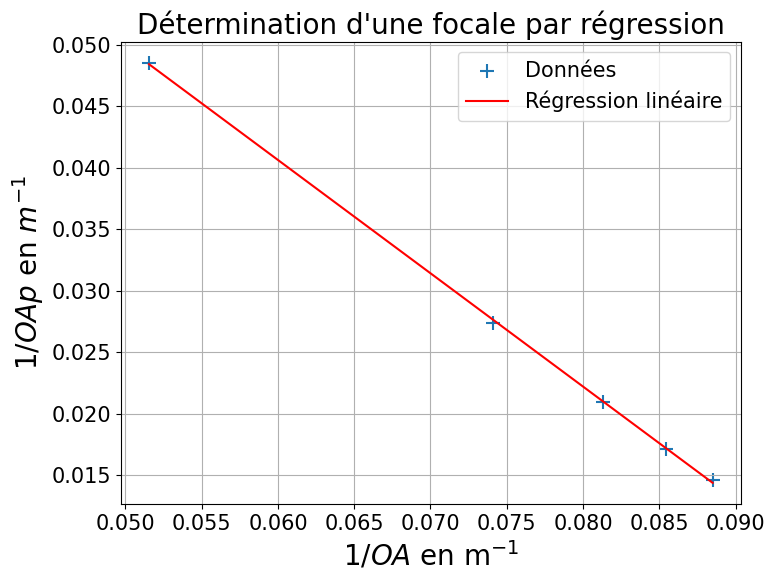

In [12]:
# découpage de l'intervalle pour fonction lisse
xliste = np.linspace(min(X), max(X), 100)
# Liste des points y_i obtenus par régression
yliste = a*xliste+b

plt.figure(figsize=(8, 6))
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel('$1/OA$ en m$^{-1}$', fontsize=20)
plt.ylabel('$1/OAp$ en $m^{-1}$', fontsize=20)

plt.scatter(X, Y, marker="+", s=100, label='Données')
plt.plot(xliste, yliste,
         'r', label='Régression linéaire')

plt.title("Détermination d'une focale par régression",
          fontsize=20)
plt.legend(fontsize=15)
plt.show()

# D) Comparaison

### Écarts relatifs

In [13]:
f_theo = (1/10)*1e2       # cm

er_bessel = abs(f_bessel-f_theo)/(f_theo)
er_silb = abs(f_silb-f_theo)/(f_theo)
er_reg = abs(f_reg-f_theo)/(f_theo)

print(f'er_bessel = {er_bessel:.2f}')
print(f'er_silb = {er_silb:.2f}')
print(f'er_reg = {er_reg:.2f}')

er_bessel = 0.02
er_silb = 0.06
er_reg = 0.04


### Conclusion

Ainsi, j'en conclue qu'avec ces résultats, la détermination par Bessel serait la meilleure. Seulement, cette conclusion repose sur les écarts relatifs, et ne nous informe en rien sur la précision de chaque mesure : il faut calculer les incertitudes pour conclure correctement.

# V/ Valider et conclure

### Incertitude pour régression

In [14]:
# Attention, X = 1/OA donc l'incertitude est composée !
uX = uOA/(OA_list**2)      # cm
uY = uOAp/(OAp_list**2)    # cm

#### Tracé du graphe pour vérification

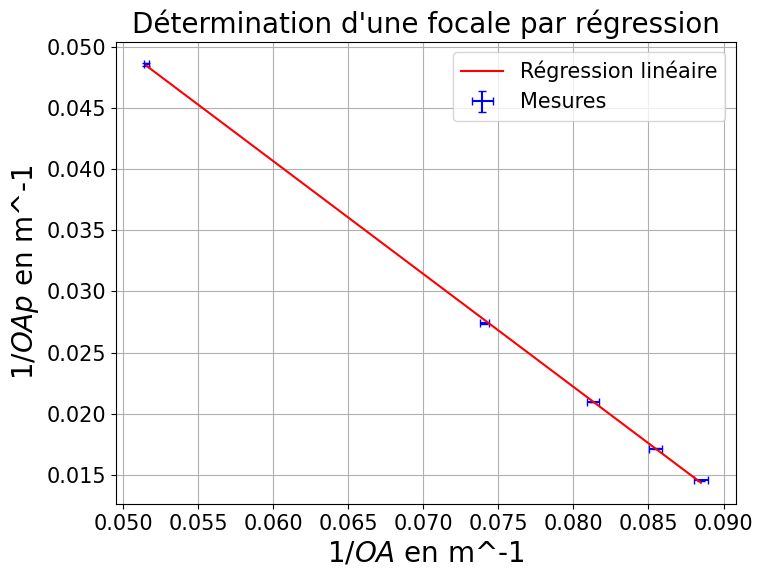

In [15]:
# découpage de l'intervalle pour fonction lisse
xliste = np.linspace(min(X), max(X), 100)
# Liste des points y_i obtenus par régression
yliste = a*xliste+b

plt.figure(figsize=(8, 6))
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel('$1/OA$ en m^-1', fontsize=20)
plt.ylabel('$1/OAp$ en m^-1', fontsize=20)

plt.errorbar(X, Y,
             xerr=uX, yerr=uY,
             linestyle='None', capsize=3,
             color='b', label='Mesures')
plt.plot(xliste, yliste,
         'r', label='Régression linéaire')

plt.title("Détermination d'une focale par régression",
          fontsize=20)
plt.legend(fontsize=15)
plt.show()

#### Monte-Carlo régression

In [16]:
Delta_X = uX*np.sqrt(3)    # demi-largeur X
Delta_Y = uY*np.sqrt(3)    # demi-largeur Y

N = 10000                  # nombre de régressions à effectuer
liste_a, liste_b = [], []  # création des listes vides pour stocker les valeurs
for i in range(N):
    X_simu = X + np.random.uniform(-Delta_X, Delta_X)
    Y_simu = Y + np.random.uniform(-Delta_Y, Delta_Y)

    a_simu, b_simu = np.polyfit(X_simu, Y_simu, 1)

    liste_a.append(a_simu)
    liste_b.append(b_simu)

a_moy, b_moy = np.mean(liste_a), np.mean(liste_b)
ua, ub = np.std(liste_a, ddof=1), np.std(liste_b, ddof=1)

print(f'Coef.directeur = {a_moy:.3e} +- {ua:.3e}')
print(f"Ordonnée à l'origine = {b_moy:.3e} +- {ub:.3e}")

Coef.directeur = -9.218e-01 +- 9.490e-03
Ordonnée à l'origine = 9.594e-02 +- 6.610e-04


In [17]:
f_reg_MC = 1/b_moy
uf_reg_MC = ub/(b_moy**2)

print(f'f_reg_MC = {f_reg_MC:.2f} ± {uf_reg_MC:.2f} cm')

f_reg_MC = 10.42 ± 0.07 cm


### Écarts normalisés

In [18]:
E_N_bess = abs(f_theo-f_bessel)/(uf_bessel)
print(f'E_N_bess = {E_N_bess:.2f}')

E_N_silb = abs(f_theo-f_silb)/(uf_silb)
print(f'E_N_silb = {E_N_silb:.2f}')

E_N_reg = abs(f_theo-f_reg)/(uf_reg_MC)
print(f'E_N_reg = {E_N_reg:.2f}')

E_N_bess = 7.82
E_N_silb = 8.66
E_N_reg = 5.86


Ainsi, j'en conclue que la méthode la plus précise est la régression linéaire. C'était attendu, étant donné que les incertitudes aléatoires se compensent dans le calcul combiné sur $f'$. Seulement, aucune des expériences n'est satisfaisante du point de vue de l'écart normalisé, toutes les exépriences donnant un écart normalisé > 2. Ça n'est pas étonnant considérant la qualité des mesures, et le fait que la valeur théorique de la lentille soit connue mais sans précision.